<h1>Business Problem</h1>

Bengaluru is home for IT companies mainly. Along with IT companies, Bengaluru is also a major contributor to economy. Since a lot of people migrate to this place, it’s difficult for people to find apartments on their own without knowing the neighborhood. Every have their own choice for locality. Some want a lot of restaurants near their locality. Like people who don't know to cook require restaurants nearby.


Choosing a suitable locality depends on varied factors including age and family status. In this project, we aim to characterize Bengaluru's neighborhoods based on the types of businesses and amenities that are situated in those neighborhoods. We will then use this data to perform K-means clustering on the locality and come up with two useful widgets that identify similar neighborhoods with price of the apartment which we have as a part of dataset.


This analysis will be especially useful for non-local workers who have migrated and who are trying to find a home in the city. It will also be useful for local Bengaluru residents who, despite their familiarity with the city, can still benefit from the data.


<h1>Data used for analysis</h1>


We will use data from Kaggle which was earlier used for prediction of prices in Bengaluru. This dataset has the Type of area, availability, location, size (1/2/3 BHK), society name, total square foot of that apartment, number of bathrooms, number of balconies, price of that for 400 neighborhoods located within Bengaluru. We choose only two columns (location and price). We will append this data with the coordinates of each of these neighborhoods that we retrieved using the Python GeoPy module.


In addition to the above data, we will use data from Foursquare API which is a local search-and-discovery service that provides recommendations of places to go near a user’s current location. We will utilize the Foursquare API to collect information on the venues within each neighborhood in order to characterize and profile each neighborhood. This neighborhood characterization can be achieved in a multitude of ways depending on the project goal and availability of data. For this project, we will characterize each neighborhood based on the entertainment, food, and shopping options located in that neighborhood. We made this choice because the intended target of this project is for people who want to buy apartments in Bengaluru.


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
!pip install folium
import folium
import numpy as np

from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
print('Libraries imported.')

Libraries imported.


In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9c92be64f7a14611b0a7039a9d7207bb = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-3nbXAvzEojO67jGfm0eKJD-dhoo7IFu51sLr-hgXE1Z',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9c92be64f7a14611b0a7039a9d7207bb.get_object(Bucket='capstoneproject-donotdelete-pr-fcbsos5khnwxo8',Key='Beng.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


area_type availability                  location       size  \
0            Plot  Area       18-Jan  Electronic City Phase II      2 BHK   
1        Built-up  Area       18-Jan          Chikka Tirupathi  4 Bedroom   
2  Super built-up  Area       18-Jan               Uttarahalli      3 BHK   
3  Super built-up  Area       19-Jan        Lingadheeranahalli      3 BHK   
4            Plot  Area       19-Jan                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
beng = df_data_3[['location','price']]

In [4]:
beng.shape

(400, 2)

In [5]:

body = client_9c92be64f7a14611b0a7039a9d7207bb.get_object(Bucket='capstoneproject-donotdelete-pr-fcbsos5khnwxo8',Key='Beng.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()
body = client_9c92be64f7a14611b0a7039a9d7207bb.get_object(Bucket='capstoneproject-donotdelete-pr-fcbsos5khnwxo8',Key='Beng.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
address = 'Bengaluru'

geolocator = Nominatim(user_agent="bengaluru")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bengaluru City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bengaluru City are 12.9791198, 77.5912997.


In [6]:
from geopy.exc import GeocoderTimedOut

def do_geocode(particularaddress):
    try:
        geolocator = Nominatim(user_agent="benghous", timeout=5)
        return geolocator.geocode(str(neigh)+',Bengaluru')
    except GeocoderTimedOut:
        return do_geocode(particularaddress)

In [7]:
# define the dataframe columns
column_names = ['location', 'Latitude', 'Longitude'] 

# instantiate the dataframe
house = pd.DataFrame(columns=column_names)

In [8]:
lis=[]
for neigh in beng['location']:
    location = do_geocode(str(neigh)+',Bengaluru')
    district=beng.loc[beng['location']==neigh]
    if location != None:
        lis.append([neigh, location.raw['lat'], location.raw['lon']])
    else:
        lis.append([neigh, 12.9791198, 77.5912997])  
    print('.', end=' ')


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [9]:
cols=['location','latitude','longitude']
fin=pd.DataFrame(lis,columns=cols)

In [10]:
result = pd.merge(fin, beng , on='location')
result.to_csv('coordi.csv')

In [11]:
result.head()

location    latitude   longitude   price
0  Electronic City Phase II  12.8468545  77.6769267   39.07
1          Chikka Tirupathi  12.8957681  77.8671014  120.00
2               Uttarahalli  12.9055682  77.5455438   62.00
3        Lingadheeranahalli     12.9791     77.5913   95.00
4                  Kothanur  13.0613601  77.6493895   51.00

We are going to plot the neighborhood locations on a map of Bengaluru using the Folium module. Clicking on the location marker will show you the name of the location.

In [12]:
map_beng = folium.Map(location=[12.9791198, 77.5912997], zoom_start=11, tiles='stamenterrain')
for lat, lng, neighborhood in zip(result['latitude'], result['longitude'], result['location']):
    lat=float(lat)
    lng=float(lng)
    label = neighborhood 
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_beng)  
    
map_beng

We can only analyze one variable from our dataset at the moment, Price which is in lakhs

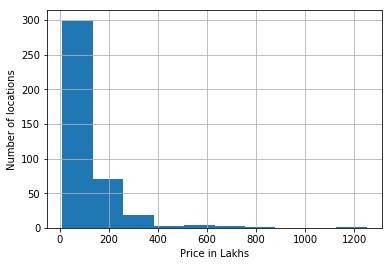

In [13]:


result['price'].hist()

plt.xlabel('Price in Lakhs')
plt.ylabel('Number of locations')
plt.show()



In [14]:
CLIENT_ID = 'HPCNUHNJAWHNWBIP2XXMXIIOZMKH0MYPP0V0K4UKCWFLFWSF' # your Foursquare ID
CLIENT_SECRET = 'XHWJFIXE1SKG2YV2P0BYQQQ2DDXTFTFUTUWXZBEXUENKLFWG' # your Foursquare Secret
VERSION = '20200727' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: HPCNUHNJAWHNWBIP2XXMXIIOZMKH0MYPP0V0K4UKCWFLFWSF
CLIENT_SECRET:XHWJFIXE1SKG2YV2P0BYQQQ2DDXTFTFUTUWXZBEXUENKLFWG


In [15]:
import json
from pandas.io.json import json_normalize
import requests

In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
def getNearbyVenues(names,latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    i=0
    for name, lat, lng in zip(names, latitudes, longitudes):
        i=i+1
        print(i)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT) # We set an upper limit of 100 venues for each neighborhood.
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
         # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The dataframe 'beng_venues' holds the data returned by the FourSquare API.

In [26]:
beng_venues = getNearbyVenues(names=result['location'],
                                   latitudes=result['latitude'],
                                   longitudes=result['longitude']
                                  )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277




Let's examine the data returned by Foursquare:


In [27]:
beng_venues.head()

Neighborhood Neighborhood Latitude Neighborhood Longitude  \
0  Electronic City Phase II            12.8468545             77.6769267   
1  Electronic City Phase II            12.8468545             77.6769267   
2  Electronic City Phase II            12.8468545             77.6769267   
3  Electronic City Phase II            12.8468545             77.6769267   
4  Electronic City Phase II            12.8468545             77.6769267   

                             Venue  Venue Latitude  Venue Longitude  \
0                 TCS Think Campus       12.847598        77.679138   
1          TCS Think Campus Ground       12.848344        77.679267   
2                Coffee Day Xpress       12.848827        77.678946   
3  Mint-The Kitchen, Think Campus.       12.848941        77.678960   
4                 Volga Food Court       12.850519        77.677667   

                  Venue Category  
0                Coworking Space  
1               Basketball Court  
2                           Café  
3  Vegetarian / Vegan Restaurant  
4              Indian Restaurant

In [28]:
beng_venues.shape

(2898, 7)

In [29]:
beng_venues.to_csv('bengvenues.csv')

In [30]:
len(beng_venues['Neighborhood'].value_counts())

353



We can see that our dataframe 'beng_venues' includes the name of the venue, its coordinates, and its category/type along with information on the neighborhood in which it is located. The FourSquare API returned a total of 2898 venues for 353 neighborhoods.

In the histogram below, we can see that the Foursquare data returned less than 15 venues for around 20 neighborhoods. While this probably indicates that these neighborhoods are secluded and residential, it could also suggest that more data is needed. This can be focused on in future iterations of this project. Also, there are 2 neighborhoods for which no results (i.e. venues) were returned from FourSquare. These neighborhoods have accordingly not been included in the following analysis.


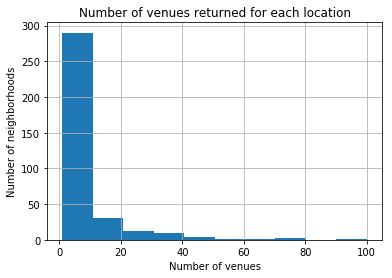

In [31]:
beng_venues.groupby('Neighborhood').count().sort_values('Venue').Venue.hist()

plt.title('Number of venues returned for each location')
plt.xlabel('Number of venues')
plt.ylabel('Number of neighborhoods')
plt.show()

We create indicator variables for every category:

In [33]:
beng_onehot = pd.get_dummies(beng_venues[['Venue Category']], prefix="", prefix_sep="")
beng_onehot.drop('Neighborhood' , axis='columns', inplace=True)
# add neighborhood column back to dataframe
beng_onehot.insert(0, "Neighborhood", beng_venues['Neighborhood'], True) 

beng_onehot.loc[beng_onehot['Indian Restaurant']==1, :]

Neighborhood  ATM  Accessories Store  \
4               Electronic City Phase II    0                  0   
6               Electronic City Phase II    0                  0   
33                      Old Airport Road    0                  0   
41                      Old Airport Road    0                  0   
43                      Old Airport Road    0                  0   
49                      Old Airport Road    0                  0   
50                      Old Airport Road    0                  0   
51                      Old Airport Road    0                  0   
56                      Old Airport Road    0                  0   
60                      Old Airport Road    0                  0   
70                          Rajaji Nagar    0                  0   
72                          Rajaji Nagar    0                  0   
86                          Marathahalli    0                  0   
87                          Marathahalli    0                  0   
91                          Marathahalli    0                  0   
92                          Marathahalli    0                  0   
95                          Marathahalli    0                  0   
98                          Marathahalli    0                  0   
101                         Marathahalli    0                  0   
103                         Gandhi Bazar    0                  0   
105                         Gandhi Bazar    0                  0   
110                         Gandhi Bazar    0                  0   
117                         Gandhi Bazar    0                  0   
119                         Gandhi Bazar    0                  0   
121                         Gandhi Bazar    0                  0   
124                         Gandhi Bazar    0                  0   
127                   7th Phase JP Nagar    0                  0   
130                   7th Phase JP Nagar    0                  0   
131                   7th Phase JP Nagar    0                  0   
133                   7th Phase JP Nagar    0                  0   
139                   7th Phase JP Nagar    0                  0   
140                   7th Phase JP Nagar    0                  0   
141                   7th Phase JP Nagar    0                  0   
143                   7th Phase JP Nagar    0                  0   
146                   7th Phase JP Nagar    0                  0   
150                            Gottigere    0                  0   
152                            Gottigere    0                  0   
164                             Sarjapur    0                  0   
172                             Sarjapur    0                  0   
173                             Sarjapur    0                  0   
174                             Sarjapur    0                  0   
179                             Sarjapur    0                  0   
184                             Sarjapur    0                  0   
187                             Sarjapur    0                  0   
189                             Sarjapur    0                  0   
238                     Ramagondanahalli    0                  0   
249                               Hebbal    0                  0   
253                        Kasturi Nagar    0                  0   
265                       Kanakpura Road    0                  0   
273             Electronics City Phase 1    0                  0   
275             Electronics City Phase 1    0                  0   
277             Electronics City Phase 1    0                  0   
284             Electronics City Phase 1    0                  0   
295                       Chikkalasandra    0                  0   
296                       Chikkalasandra    0                  0   
297                       Chikkalasandra    0                  0   
301                        Murugeshpalya    0                  0   
302                        Murugeshpalya    0                  0   
314             

Next, let's group rows by neighborhood and then standardize them to get, for every neighborhood, the proportion of venues in each category.

In [34]:
beng_grouped = beng_onehot.groupby('Neighborhood').mean().reset_index()
beng_grouped

Neighborhood       ATM  \
0                               Devarachikkanahalli  0.000000   
1                                    Mysore Highway  0.000000   
2                                       Thanisandra  0.250000   
3                                      1 Giri Nagar  0.000000   
4                               1st Block Jayanagar  0.000000   
5                                1st Phase JP Nagar  0.000000   
6                                2nd Phase JP Nagar  0.000000   
7                              2nd Stage Nagarbhavi  0.000000   
8                             3rd Block Hrbr Layout  0.000000   
9                   4 Bedroom Farm House in Bagalur  0.000000   
10                               5th Phase JP Nagar  0.000000   
11                               6th Phase JP Nagar  0.000000   
12   6th block banashankari 3rd stage, 100 feet ORR  0.000000   
13                              7th Block Jayanagar  0.000000   
14                               7th Phase JP Nagar  0.000000   
15                               8th Phase JP Nagar  0.000000   
16                            8th block Koramangala  0.000000   
17                               9th Phase JP Nagar  0.000000   
18                                      AECS Layout  0.000000   
19                                         Abbigere  0.000000   
20                                     Adarsh Nagar  0.000000   
21                                    Akshaya Nagar  0.333333   
22                                     Akshaya Vana  0.000000   
23                                             Alur  0.000000   
24                                       Ambalipura  0.000000   
25                                  Ambedkar Colony  0.000000   
26                                   Ambedkar Nagar  0.000000   
27                                      Amco Colony  0.000000   
28                                     Amruthahalli  0.333333   
29                                       Anandapura  0.000000   
30                                           Anekal  1.000000   
31                                       Anjanapura  0.000000   
32                                   Anjappa Layout  0.000000   
33                                          Arekere  0.000000   
34                                  Ashirvad Colony  0.000000   
35                                    Ashwath Nagar  0.000000   
36                                   Ashwini layout  0.000000   
37                                         Attibele  0.000000   
38                                       Avalahalli  0.000000   
39                                   B Narayanapura  0.000000   
40                                            BAGUR  0.000000   
41                                      BEML Layout  0.000000   
42                                      BHEL Layout  0.000000   
43                                Bagalur Main Road  0.000000   
44                                     Banashankari  0.000000   
45                           Banashankari Stage III  0.000000   
46                            Banashankari Stage VI  0.000000   
47                   Banashankari3rd stage bigbazar  0.000000   
48                                   Banjara Layout  0.000000   
49                                      Bank Avenue  0.000000   
50                            Bank Of Baroda Colony  0.000000   
51                                     Basavanagara  0.000000   
52                                     Basavanapura  0.000000   
53                                      Basavangudi  0.000000   
54                                  Basavanna Nagar  0.000000   
55                               Basaveshwara Nagar  0.000000   
56                                     Battarahalli  0.000000   
57                                            Begur  0.000000   
58                                       Begur Road  0.166667   
59                                         Belathur  0.000000   
60                                        Bellandur  0.000000   
61       

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['location'] = beng_grouped['Neighborhood']

for ind in np.arange(beng_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(beng_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


location 1st Most Common Venue 2nd Most Common Venue  \
0   Devarachikkanahalli     Indian Restaurant              Pharmacy   
1        Mysore Highway    Italian Restaurant                Lounge   
2           Thanisandra              Pharmacy          Liquor Store   
3          1 Giri Nagar                  Park              Vineyard   
4   1st Block Jayanagar     Indian Restaurant        Ice Cream Shop   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0  Middle Eastern Restaurant     Electronics Store    Italian Restaurant  
1                Coffee Shop  Gym / Fitness Center            Steakhouse  
2                        ATM              Creperie   Dumpling Restaurant  
3                 Food Truck      Capitol Building           Yoga Studio  
4    South Indian Restaurant         Metro Station           Salad Place



In the table above, we have listed the five most popular venues for every neighborhood. This data gives us a rough idea about a neighborhood's profile.

We have successfully characterized each neighborhood by using the data from Foursquare. This means we can get to the most interesting part (at least for me) of the project, data modelling.

In [37]:
# set number of clusters
kclusters = 6

beng_grouped_clustering = beng_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(beng_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 5, 5, 1, 5, 2, 5, 1, 1, 1], dtype=int32)

After running the K-means algorithm once more using K=6, we assign cluster labels 0 to 5 to 353 neighborhoods. We dropped five neighborhoods earlier because Foursquare didn't return any data on venues in those neighborhoods. These neighborhoods are assigned with the label 7 as a placeholder until better/more data becomes available

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

beng_merged1 = result  #the 'result' dataset contains the coordinates and rental cost for every neighborhood

# merge beng_merged with neighborhoods_venues_sorted to add latitude/longitude and price for each neighborhood
beng_merged1 = beng_merged1.join(neighborhoods_venues_sorted.set_index('location'), on='location')

beng_merged1.fillna(7, inplace=True) #assigning cluster label '10' to the neighborhoods which didn't have any venues
beng_merged1['Cluster Labels']=beng_merged1['Cluster Labels'].astype('int64')
beng_merged1.head()



location    latitude   longitude   price  Cluster Labels  \
0  Electronic City Phase II  12.8468545  77.6769267   39.07               2   
1          Chikka Tirupathi  12.8957681  77.8671014  120.00               7   
2               Uttarahalli  12.9055682  77.5455438   62.00               5   
3        Lingadheeranahalli     12.9791     77.5913   95.00               1   
4                  Kothanur  13.0613601  77.6493895   51.00               5   

  1st Most Common Venue 2nd Most Common Venue          3rd Most Common Venue  \
0     Indian Restaurant       Coworking Space  Vegetarian / Vegan Restaurant   
1                     7                     7                              7   
2  Fast Food Restaurant           Bus Station                           Café   
3                  Park              Vineyard                     Food Truck   
4           Coffee Shop    Italian Restaurant                         Bakery   

      4th Most Common Venue 5th Most Common Venue  
0                      Café                 Diner  
1                         7                     7  
2             Movie Theater           Yoga Studio  
3          Capitol Building           Yoga Studio  
4  Mediterranean Restaurant           Pizza Place

We will now plot markers for all the neighborhoods on a map of Bengaluru with each marker colored according to its assigned cluster. Clicking on a marker will show you the location's name and cluster label.

In [53]:
map_clusters = folium.Map(location=[12.9791198, 77.5912997], zoom_start=11, tiles='stamenterrain')

# set color scheme for the clusters
x = np.arange(kclusters+1)
ys = [i + x + (i*x)**2 for i in range(kclusters+1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, price, poi, cluster in zip(beng_merged1['latitude'], beng_merged1['longitude'],result['price'], beng_merged1['location'], beng_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+'price'+str(price)+'lakhs', parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
beng_merged1.loc[beng_merged1['Cluster Labels'] == 0, beng_merged1.columns[[0] + list(range(5, beng_merged1.shape[1]))]]

location 1st Most Common Venue    2nd Most Common Venue  \
58     Kaval Byrasandra                Bakery              Yoga Studio   
127      Nagondanahalli                Bakery              Yoga Studio   
164              Jigani                Bakery              Yoga Studio   
179               Begur            Playground  Fruit & Vegetable Store   
328            Abbigere      Business Service      Indie Movie Theater   
378  Horamavu Banaswadi                Bakery        Andhra Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
58      Food & Drink Shop           Flower Shop           Flea Market  
127     Food & Drink Shop           Flower Shop           Flea Market  
164     Food & Drink Shop           Flower Shop           Flea Market  
179                Bakery           Yoga Studio           Dry Cleaner  
328                Bakery           Yoga Studio   Dumpling Restaurant  
378          Intersection                  Café        Clothing Store

In [43]:
beng_merged1.loc[beng_merged1['Cluster Labels'] == 1, beng_merged1.columns[[0] + list(range(5, beng_merged1.shape[1]))]]

location 1st Most Common Venue  \
3                                Lingadheeranahalli                  Park   
14                                    Bisuvanahalli                  Park   
15                            Raja Rajeshwari Nagar                  Park   
17                               Manayata Tech Park                  Park   
19                                       Binny Pete                  Park   
21                                        Bellandur                  Park   
24                                  Electronic City                  Park   
41                                      Bhoganhalli                  Park   
42                             Lakshminarayana Pura                  Park   
55                                        Kothannur                  Park   
60                             Kodanda Reddy Layout                  Park   
64                                     Kasavanhalli                  Park   
68                        Sarjapura - Attibele Road                  Park   
69                                   Devasthanagalu                  Park   
73                                Green View Layout                  Park   
78                               Lakshmiamma Garden                  Park   
88                               Vishwapriya Layout                  Park   
89         Ramaswamy Palya - Kammanahalli Main Road                  Park   
95                             Vishveshwarya Layout                  Park   
107                                   RMV Extension                  Park   
109                                Jai Bheema Nagar                  Park   
110                            Kothnur Narayanapura                  Park   
113                                 CHIKKATIRUPATHI                  Park   
114                              Kumaraswami Layout                  Park   
120                              Pattandur Agrahara                  Park   
122                                       MS Pallya                  Park   
137    Lakshminarayanapura, Electronic City Phase 2                  Park   
138                         Muthurayya Swamy Layout                  Park   
141                        Dodda Nekkundi Extension                  Park   
144                     Dr Shivarama Karantha Nagar                  Park   
146                                 Kullappa Colony                  Park   
147                                  Mukkutam Nagar                  Park   
149                          Ncpr Industrial Layout                  Park   
150                                      Meenakunte                  Park   
153                       Shree Ananth Nagar Layout                  Park   
161                                  Talaghattapura                  Park   
165                          Gollarapalya Hosahalli                  Park   
180                                        JP Nagar                  Park   
181                         Sunder Ram Shetty Nagar                  Park   
184                                     Munnekollal                  Park   
185                                  Motappa Layout                  Park   
186                                    Akshaya Vana                  Park   
188                                 Basavanna Nagar                  Park   
192                               Somasundara Palya                  Park   
193                                       T.C PALYA                  Park   
204                  Banashankari3rd stage bigbazar                  Park   
208                    Binny Mills Employees Colony                  Park   
211                              5th Phase JP Nagar                  Park   
212                                     Kodigehaali                  Park   
214                                    Billekahalli                  Park   
224                                    Battarahalli                  Park   
225                                Goku

In [50]:
beng_merged1.loc[beng_merged1['Cluster Labels'] == 2, beng_merged1.columns[[0] + list(range(5, beng_merged1.shape[1]))]].head()

location 1st Most Common Venue 2nd Most Common Venue  \
0   Electronic City Phase II     Indian Restaurant       Coworking Space   
6           Old Airport Road     Indian Restaurant           Coffee Shop   
8               Marathahalli     Indian Restaurant        Clothing Store   
9               Gandhi Bazar     Indian Restaurant  Fast Food Restaurant   
10        7th Phase JP Nagar     Indian Restaurant           Snack Place   

            3rd Most Common Venue   4th Most Common Venue  \
0   Vegetarian / Vegan Restaurant                    Café   
6              Chinese Restaurant                   Hotel   
8                    Burger Joint  Furniture / Home Store   
9                     Coffee Shop          Ice Cream Shop   
10        South Indian Restaurant          Sandwich Place   

   5th Most Common Venue  
0                  Diner  
6              Juice Bar  
8             Restaurant  
9             Hookah Bar  
10     Electronics Store

In [45]:
beng_merged1.loc[beng_merged1['Cluster Labels'] == 3, beng_merged1.columns[[0] + list(range(5, beng_merged1.shape[1]))]]

location 1st Most Common Venue 2nd Most Common Venue  \
159  KUDLU MAIN ROAD       Badminton Court           Yoga Studio   
201           Harlur       Badminton Court      Department Store   
344            Kudlu       Badminton Court           Yoga Studio   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
159     Food & Drink Shop           Flower Shop           Flea Market  
201                   Gym           Yoga Studio           Flea Market  
344     Food & Drink Shop           Flower Shop           Flea Market

In [46]:
beng_merged1.loc[beng_merged1['Cluster Labels'] == 4, beng_merged1.columns[[0] + list(range(5, beng_merged1.shape[1]))]]

location 1st Most Common Venue 2nd Most Common Venue  \
44        Devanahalli                   ATM             Drugstore   
77     Jalahalli West                   ATM             Drugstore   
194  Muneshwara Nagar                   ATM    Falafel Restaurant   
198   Prashanth Nagar                   ATM     Indian Restaurant   
202      Sampigehalli                   ATM             Bookstore   
217            Anekal                   ATM             Drugstore   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
44            Flea Market         Fishing Store     Fish & Chips Shop  
77            Flea Market         Fishing Store     Fish & Chips Shop  
194             Drugstore           Flea Market         Fishing Store  
198           Tailor Shop             Drugstore           Flea Market  
202     Food & Drink Shop           Flower Shop           Flea Market  
217           Flea Market         Fishing Store     Fish & Chips Shop

In [47]:
beng_merged1.loc[beng_merged1['Cluster Labels'] == 5, beng_merged1.columns[[0] + list(range(5, beng_merged1.shape[1]))]]

location    1st Most Common Venue  \
2                    Uttarahalli     Fast Food Restaurant   
4                       Kothanur              Coffee Shop   
5                     Whitefield                     Park   
7                   Rajaji Nagar                Juice Bar   
12                      Sarjapur        Indian Restaurant   
13                   Mysore Road        Accessories Store   
16         Ramakrishnappa Layout                      ATM   
18                       Kengeri              Pizza Place   
20                   Thanisandra                 Pharmacy   
22                   Thanisandra                 Pharmacy   
25              Ramagondanahalli         Asian Restaurant   
26                     Yelahanka                      ATM   
28                 Kasturi Nagar                     Café   
31                  Kundalahalli     Fast Food Restaurant   
33                 Murugeshpalya        Indian Restaurant   
34                Sarjapur  Road              Yoga Studio   
36                    HSR Layout        Indian Restaurant   
37                  Doddathoguru         Asian Restaurant   
39              Himagiri Meadows                  Brewery   
40                  Adarsh Nagar                Juice Bar   
45        Govindaraja Nagar Ward                   Bakery   
49                        Gunjur                     Lake   
52                   Hegde Nagar              Flea Market   
53                  Haralur Road                  Dog Run   
56               Kalena Agrahara               Playground   
59                   ISRO Layout              Snack Place   
61              Garudachar Palya                   Bakery   
62                     EPIP Zone               Restaurant   
63                    Dasanapura  North Indian Restaurant   
65                  Sanjay nagar                     Park   
66                Mysore Highway       Italian Restaurant   
67                        Domlur        Indian Restaurant   
70                 T Dasarahalli            Metro Station   
71                  Yeshwanthpur     Fast Food Restaurant   
72                    Chandapura                      ATM   
74          Shantiniketan Layout  South Indian Restaurant   
75                        Peenya       Light Rail Station   
76                    Nagarbhavi                      Gym   
80              Ramamurthy Nagar                      ATM   
82                 Akshaya Nagar                      ATM   
84                      Kadugodi               Restaurant   
85              LB Shastri Nagar                Juice Bar   
87                       Hormavu                      ATM   
91            8th Phase JP Nagar  South Indian Restaurant   
92   Bommasandra Industrial Area      Sporting Goods Shop   
93                Chandra Layout              Bus Station   
96        Kengeri Satellite Town              Pizza Place   
97                  Basavanapura               Kids Store   
102                     Hulimavu               Restaurant   
105                    Hosa Road               Food Court   
106                Keshava Nagar           Ice Cream Shop   
112               CV Raman Nagar           Breakfast Spot   
116             Hebbal Kempapura         Department Store   
117                  Vijayanagar               Playground   
118        8th block Koramangala        Indian Restaurant   
123                   Nagasandra              Gas Station   
125                       Kogilu               Food Truck   
126                     Panathur            Train Station   
129          1st Block Jayanagar        Indian Restaurant   
131          Off Sarjapur Road,         Indian Restaurant   
132          Tala Cauvery Layout              Bus Station   
134                  Magadi Road                   Circus   
135                  Ngef Layout                   Market   
136                  Koramangala        Indian Restaurant   
139                  Dommasandra                   Market  

In [49]:
beng_merged1[['location','Cluster Labels']].groupby('Cluster Labels').count()

location
Cluster Labels          
0                      6
1                    103
2                     81
3                      3
4                      6
5                    154
7                     47